===== THÔNG TIN DỮ LIỆU =====
Kích thước: (24, 14)


,Year,Time Code,Country Name,Country Code,GDP,GDP_per_capita,Population,FDI,FDI_out,Inflation,ExchangeRate,Export,Import,TradeBalance
0,2000,YR2000,Viet Nam,VNM,3.117252e+10,404.029784,77154011,4.163924,0.0,-1.710337,14167.75000,2.896549e+10,3.127306e+10,-2.307570e+09
1,2001,YR2001,Viet Nam,VNM,3.268520e+10,419.205678,77969361,3.977335,0.0,-0.431545,14725.16667,3.005838e+10,3.243586e+10,-2.377476e+09
2,2002,YR2002,Viet Nam,VNM,3.506411e+10,445.132862,78772224,3.992687,0.0,3.830828,15279.50000,3.341211e+10,3.949111e+10,-6.079002e+09
3,2003,YR2003,Viet Nam,VNM,3.955251e+10,497.117089,79563777,3.666012,0.0,3.234648,15509.58333,4.029865e+10,5.051156e+10,-1.021291e+10
4,2004,YR2004,Viet Nam,VNM,4.542785e+10,565.452285,80338971,3.544081,0.0,7.754947,15746.00000,5.297007e+10,6.393764e+10,-1.096757e+10



Biến đầu vào: ['GDP_per_capita', 'Population', 'FDI', 'FDI_out', 'Inflation', 'ExchangeRate', 'Export', 'Import', 'TradeBalance']

Train: 2000 → 2018
Test : 2019 → 2023

===== KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH =====
MAE : 4,454,662,907 USD
RMSE: 5,536,819,426 USD
R²  : 0.9793

===== SO SÁNH THỰC TẾ & DỰ ĐOÁN =====


,Year,GDP_Thực_tế,GDP_Dự_đoán
0,2019,3.343650e+11,3.318193e+11
1,2020,3.466160e+11,3.422802e+11
2,2021,3.664750e+11,3.685551e+11
3,2022,4.134450e+11,4.109770e+11
4,2023,4.338580e+11,4.230144e+11


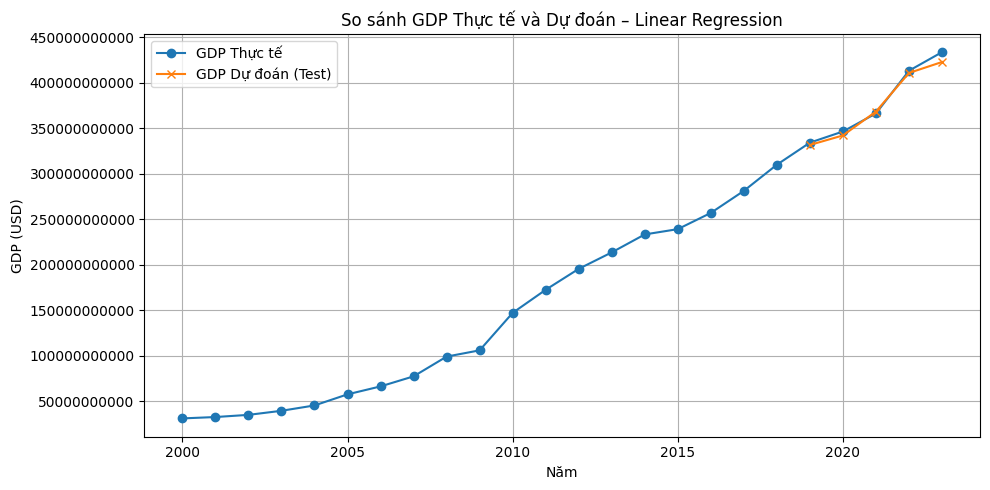


===== HỆ SỐ HỒI QUY CỦA CÁC BIẾN =====


,Biến kinh tế,Hệ số hồi quy
0,GDP_per_capita,2.371716e+11
7,Import,2.276731e+10
6,Export,2.207630e+10
5,ExchangeRate,1.169721e+09
8,TradeBalance,9.403310e+08
2,FDI,-5.588752e+08
3,FDI_out,-1.724736e+09
1,Population,-3.810301e+09
4,Inflation,-4.568009e+09


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. ĐỌC DỮ LIỆU ĐÃ TIỀN XỬ LÝ
df = pd.read_csv("macro_vietnam_processed.csv")

print("===== THÔNG TIN DỮ LIỆU =====")
print("Kích thước:", df.shape)
display(df.head())

# 2. CHỌN BIẾN ĐẦU VÀO & BIẾN MỤC TIÊU
# Biến mục tiêu (GDP)
y = df["GDP"]

# Các biến kinh tế vĩ mô dùng để dự đoán GDP
feature_cols = [
    "GDP_per_capita",
    "Population",
    "FDI",
    "FDI_out",
    "Inflation",
    "ExchangeRate",
    "Export",
    "Import",
    "TradeBalance"
]

X = df[feature_cols]

print("\nBiến đầu vào:", feature_cols)

# 3. CHIA TẬP TRAIN / TEST THEO CHUỖI THỜI GIAN
n_test = 5  # Giấu 5 năm cuối để đánh giá mô hình

X_train = X.iloc[:-n_test]
X_test  = X.iloc[-n_test:]

y_train = y.iloc[:-n_test]
y_test  = y.iloc[-n_test:]

years_train = df["Year"].iloc[:-n_test]
years_test  = df["Year"].iloc[-n_test:]

print(f"\nTrain: {years_train.min()} → {years_train.max()}")
print(f"Test : {years_test.min()} → {years_test.max()}")

# 4. CHUẨN HÓA DỮ LIỆU
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5. HUẤN LUYỆN MÔ HÌNH LINEAR REGRESSION
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. DỰ ĐOÁN & ĐÁNH GIÁ MÔ HÌNH
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n===== KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH =====")
print(f"MAE : {mae:,.0f} USD")
print(f"RMSE: {rmse:,.0f} USD")
print(f"R²  : {r2:.4f}")

# 7. BẢNG SO SÁNH GDP THỰC TẾ & DỰ ĐOÁN
result_df = pd.DataFrame({
    "Year": years_test.values,
    "GDP_Thực_tế": y_test.values,
    "GDP_Dự_đoán": y_pred
})

print("\n===== SO SÁNH THỰC TẾ & DỰ ĐOÁN =====")
display(result_df)

# 8. BIỂU ĐỒ SO SÁNH GDP THỰC TẾ & DỰ ĐOÁN
plt.figure(figsize=(10,5))

plt.plot(df["Year"], y, label="GDP Thực tế", marker="o")
plt.plot(years_test, y_pred, label="GDP Dự đoán (Test)", marker="x")

plt.title("So sánh GDP Thực tế và Dự đoán – Linear Regression")
plt.xlabel("Năm")
plt.ylabel("GDP (USD)")
plt.legend()
plt.grid(True)
plt.ticklabel_format(style="plain", axis="y")

plt.tight_layout()
plt.show()

# 9. PHÂN TÍCH HỆ SỐ HỒI QUY
coef_df = pd.DataFrame({
    "Biến kinh tế": feature_cols,
    "Hệ số hồi quy": model.coef_
}).sort_values(by="Hệ số hồi quy", ascending=False)

print("\n===== HỆ SỐ HỒI QUY CỦA CÁC BIẾN =====")
display(coef_df)
